<a href="https://colab.research.google.com/github/ssabuj/myappsample/blob/master/ML_12_Advance_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the packages

import pandas as pd
import numpy as np

# Visulisation
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train = pd.read_csv('https://query.data.world/s/gb5wjsz5c76sgfyeas22h4loq7syqt')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# What you think, Are the major variables that are important for the prediction of the suvival of a passenger?
# Sex
# Age
# Fare/Class

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
100*train.isnull().sum()/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## EDA

In [0]:
train.Fare.quantile(0.75)

31.0

In [0]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [0]:
100*pd.crosstab(train.Survived, train.Sex, normalize=True)

Sex,female,male
Survived,,
0,9.090909,52.525253
1,26.150393,12.233446


Now bucket the age variable into 4 groups defined as: 

> "Age" <= 16: 0

> 16  & <= 32 :1

> 32 & <= 48 :2

> 48 & <= 64 :3

> "Age" > 64 :4



In [0]:
train['Age_group'] = pd.cut(train['Age'], bins = [0,16, 32, 48, 64, 200], labels = [0,1,2,3,4])

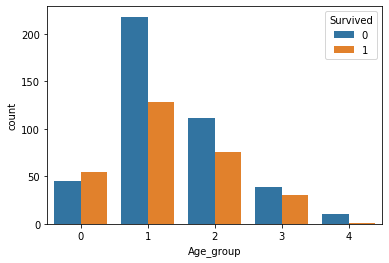

In [0]:
sns.countplot("Age_group", hue = 'Survived', data = train)

In [0]:
train.drop("Age_group", axis = 1, inplace = True)

## Missing Value Treatment

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [0]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F2             3
              ..
C30            1
B94            1
D56            1
E12            1
A26            1
Name: Cabin, Length: 147, dtype: int64

In [0]:
100*train.isnull().sum()/len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

In [0]:
train['section'] = train.Cabin.str[0]

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,section
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [0]:
train.groupby(['Pclass', 'section']).count()

PassengerId  Survived  Name  Sex  ...  Ticket  Fare  Cabin  Embarked
Pclass section                                    ...                               
1      A                 15        15    15   15  ...      15    15     15        15
       B                 47        47    47   47  ...      47    47     47        47
       C                 59        59    59   59  ...      59    59     59        59
       D                 29        29    29   29  ...      29    29     29        29
       E                 25        25    25   25  ...      25    25     25        25
       T                  1         1     1    1  ...       1     1      1         1
2      D                  4         4     4    4  ...       4     4      4         4
       E                  4         4     4    4  ...       4     4      4         4
       F                  8         8     8    8  ...       8     8      8         8
3      E                  3         3     3    3  ...       3     3      3         3
       F                  5         5     5    5  ...       5     5      5         5
       G                  4         4     4    4  ...       4     4      4         4

[12 rows x 11 columns]

In [0]:
train.drop('section', axis =1, inplace = True)

In [0]:
train.drop('Cabin', axis = 1, inplace = True)

In [0]:
100*train.isnull().sum()/len(train)

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Name            0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Ticket          0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

## Iterative Imputer 

In [0]:
# All the data should be in numeric format
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [0]:
train.drop('PassengerId', axis = 1, inplace = True)

In [0]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [0]:
train.Sex.replace(['female', 'male'], [0, 1], inplace = True)

In [0]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
train.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [0]:
from fancyimpute import IterativeImputer
train_cols = train.columns
ii = IterativeImputer()
train_clean = pd.DataFrame(ii.fit_transform(train))
train_clean.columns = train_cols

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [0]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [0]:
100*train_clean.isnull().sum()/len(train_clean)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [0]:
train_clean.dtypes

Survived    float64
Pclass      float64
Sex         float64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked    float64
dtype: object

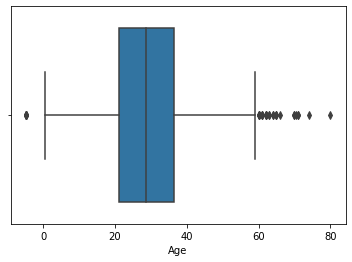

In [0]:
sns.boxplot(train_clean['Age'])

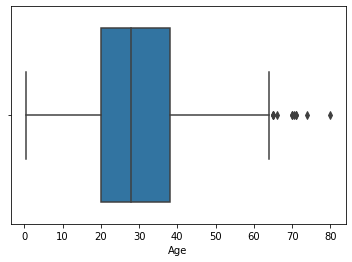

In [0]:
sns.boxplot(train['Age'])

In [0]:
train_clean.drop(train_clean.index[train_clean['Age']<0], inplace = True)

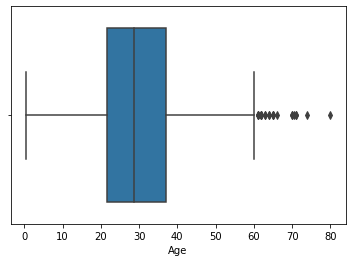

In [0]:
sns.boxplot(train_clean['Age'])

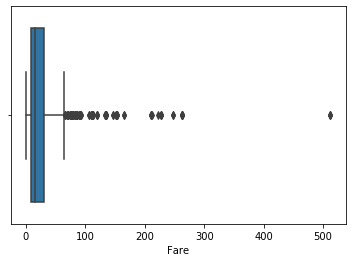

In [0]:
# Fare Column
sns.boxplot(train_clean['Fare'])

In [0]:
train_clean.drop(train_clean.index[train_clean['Fare']>300], inplace = True)

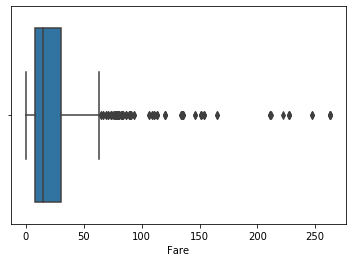

In [0]:
sns.boxplot(train_clean['Fare'])

In [0]:
train_clean.loc[train_clean['Fare']>200, :].Survived.value_counts()

1.0    11
0.0     6
Name: Survived, dtype: int64

## Data Preparation for Modelling

In [0]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [0]:
train_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [0]:
for i in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']:
  train_clean[i] = pd.to_numeric(train_clean[i])
  train_clean[i] = train_clean[i].astype(int)

In [0]:
train_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
train_clean.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [0]:
X = train_clean.drop("Survived", axis = 1)
y = train_clean.Survived

In [0]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [0]:
# Let's create dummies for cat data
# pd.get_dummies: It requires the data into object datatype
for i in ['Pclass', 'SibSp', 'Parch','Embarked']:
  X[i] = X[i].astype(str)

In [0]:
cat_data = X[['Pclass', 'SibSp', 'Parch','Embarked']]
cat_data.head()

,Pclass,SibSp,Parch,Embarked
0,3,1,0,2
1,1,1,0,0
2,3,0,0,2
3,1,1,0,2
4,3,0,0,2


In [0]:
X_dummies = pd.get_dummies(cat_data, drop_first=True)

In [0]:
X.drop(list(cat_data.columns),axis =1, inplace = True)

In [0]:
X = pd.concat([X, X_dummies], axis = 1)
X.head()

,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_1,Embarked_2
0,1,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0,38.0,71.2833,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
# Divide the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [0]:
# Scaling of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Data Imbalance
100*y_train.value_counts()/len(y_train)

0    61.525974
1    38.474026
Name: Survived, dtype: float64

## Modelling Process

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.8075471698113208
Sensitivity 0.7254901960784313


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l1', solver = 'saga')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.8113207547169812
Sensitivity 0.7254901960784313


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l2', solver = 'saga')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.8075471698113208
Sensitivity 0.7254901960784313


In [0]:
# C: Penalty Parameter: 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l1', solver = 'saga', C = 0.1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.8226415094339623
Sensitivity 0.7058823529411765


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l1', solver = 'saga', C = 0.1, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.7924528301886793
Sensitivity 0.7450980392156863


In [0]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.0001, 0.001, 0.005, 0.01, 0.02, 0.03, 0.3, 0.4, 1, 2], 'penalty': ['l1', 'l2']}
estimator  = LogisticRegression(class_weight = 'balanced')

model = GridSearchCV(estimator = estimator, cv=5, param_grid = params, scoring = 'recall')
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.01, 0.02, 0.03, 0.3, 0.4,
                               1, 2],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [0]:
model.best_params_

{'C': 1, 'penalty': 'l2'}

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
logreg = LogisticRegression(penalty='l2', solver = 'saga', C = 1, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy {}".format(accuracy_score(y_test, y_pred)))
print("Sensitivity {}".format(recall_score(y_test, y_pred)))

Accuracy 0.7849056603773585
Sensitivity 0.7549019607843137


In [0]:
# pipeline: PCA+ Modelling + Penalty + CV + Model Deployment